In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os
from scipy.optimize import curve_fit
import pandas as pd
from pathlib import Path

from Analysis.utils import SigTools as sg

In [50]:
collpath = '/home/hargy/Scientific/DataCold/Experimental-Data/Project-Phoenix/PHASE-I/Coll2/'
dirpath  = '/home/hargy/Scientific/DataCold/Experimental-Data/Project-Phoenix/PHASE-I/Coll2/LiF10_108/'
filepath = '/home/hargy/Scientific/DataCold/Experimental-Data/Project-Phoenix/PHASE-I/Coll2/LiF10_108/it_4.txt'

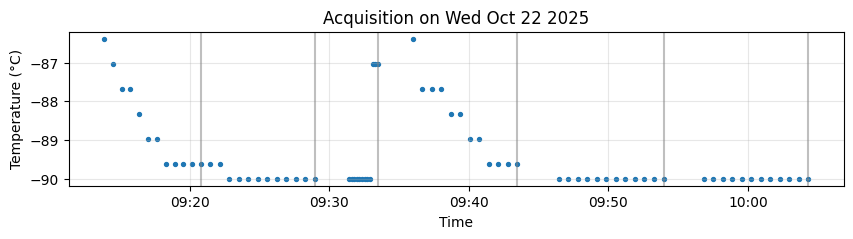

In [3]:
collpath = '/home/hargy/Scientific/DataCold/Experimental-Data/Project-Phoenix/PHASE-II/Coll2/'
times, temps, cuts = sg.get_coll_temp_timeline(collpath)
fig, ax = sg.plot_temp_timeline(times, temps, cuts = cuts)

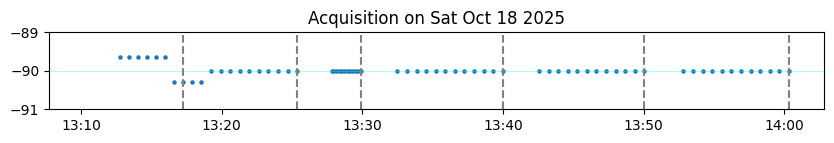

In [30]:
collpath = '/home/hargy/Scientific/DataCold/Experimental-Data/Project-Phoenix/PHASE-II/Coll1/'
times, temps, cuts = sg.get_coll_temp_timeline(collpath)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,1))

ax.axhline(-90, color = 'cyan', alpha = 0.5, linewidth = 0.5)

ax.scatter(times, temps, s = 5)
ax.set_ylim(-91, -89)

# Format x-axis: only hours:minutes
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.xaxis.set_major_locator(mdates.AutoDateLocator())

if len(times) > 0:
    date_title = times[0].strftime("%a %b %d %Y")  # e.g. "Fri Oct 17 2025"
    ax.set_title(f"Acquisition on {date_title}")

for cut in cuts:
    ax.axvline(cut, color='grey', linestyle = '--')


In [13]:
amp = sg.get_spectrum_amp(x,y, 620)
print(amp)

908.0


(0.0, 1869.345)

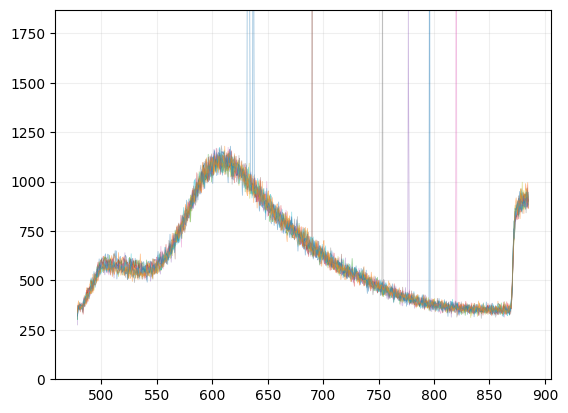

In [34]:
dirpath  = '/home/hargy/Scientific/DataCold/Experimental-Data/Project-Phoenix/PHASE-I/Coll2/LiF10_107/'

i = 0
while True:
    try:
        x, y = sg.read_spectrum(os.path.join(dirpath, f'it_{i}.txt'))
        plt.plot(x,y, linewidth = 0.5, alpha = 0.5)
        i+=1
    except:
        break

plt.grid("on", alpha = 0.2)
plt.ylim(0, 3 * np.mean(y))

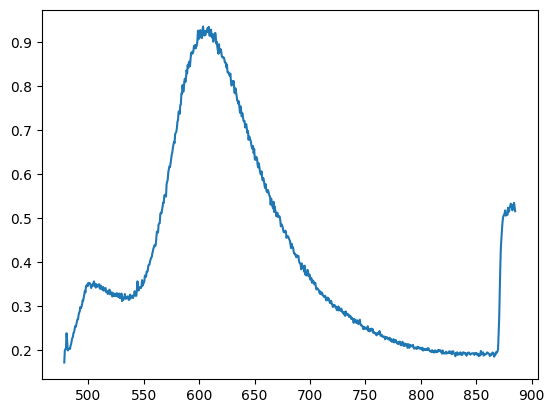

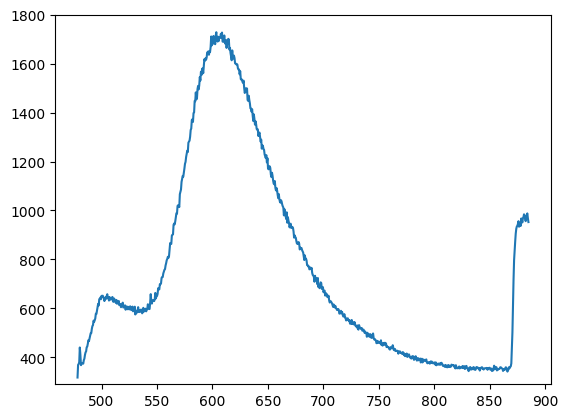

(290.0, 1800.0)

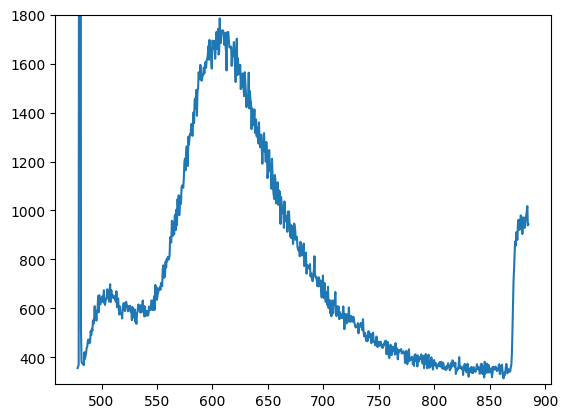

In [8]:
x, y = sg.read_spectrum(filepath)
it_mtx       = sg.gen_iteration_matrix(dirpath)
combined_arr = sg.combine_iterations(it_mtx, method='mean-weighted')

factor       = 30*4*15.4
fin_arr      = sg.scale_array(combined_arr, factor)

plt.plot(x, fin_arr)
plt.show()

plt.plot(x,combined_arr)
plt.ylim(290, 1800)
plt.show()

plt.plot(x,y)
plt.ylim(290, 1800)

In [5]:
acq_dict = sg.read_acquisition_data(filepath)
timestamp = acq_dict['Date and Time']
temp      = float(acq_dict['Temperature (C)'])

In [6]:
temp

-90.0

In [13]:
str(acq_dict['Date and Time'])

'Fri Oct 17 07:05:23.249 2025'

In [15]:
from datetime import datetime

s = str(acq_dict['Date and Time'])
dt = datetime.strptime(s, "%a %b %d %H:%M:%S.%f %Y")

print(dt)


2025-10-17 07:05:23.249000


In [5]:
sg.get_coll_temp_timeline(collpath)

AM
BL
H2O
LiF10_106
LiF10_107
LiF10_108


(470.0, 700.0)

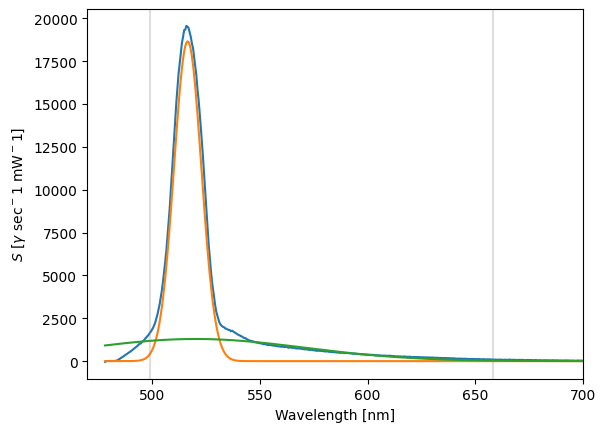

In [6]:
# Get baseline
bl_dirpath = '/home/hargy/Scientific/DataCold/Experimental-Data/Project-Phoenix/PHASE-I/Coll2/BL/'
x, _       = sg.read_spectrum(os.path.join(bl_dirpath, 'it_0.txt'))
it_mtx       = sg.gen_iteration_matrix(bl_dirpath)
combined_arr = sg.combine_iterations(it_mtx, method='mean-weighted')

bl = np.mean(combined_arr)

# Ramana Scratchpad
dirpath  = '/home/hargy/Scientific/DataCold/Experimental-Data/Project-Phoenix/PHASE-I/Coll2/H2O/'
x, _     = sg.read_spectrum(os.path.join(dirpath, 'it_0.txt'))

it_mtx       = sg.gen_iteration_matrix(dirpath)
combined_arr = sg.combine_iterations(it_mtx, method='mean-weighted')

# subtract baseline
combined_arr = sg.remove_baseline(combined_arr, bl)

factor       = 1 #0.5*4*15.4
fin_arr      = sg.scale_array(combined_arr, factor)


# --------------------------------------------------------------------
def gaussian(x, a, s, m):
    return a * np.exp(-((x-m)**2)/(2*(s**2)))

def double_gaussian(x, a1, s1, m1, a2, s2, m2):
    return gaussian(x, a1, s1, m1) + gaussian(x, a2, s2, m2)


l_cut = 40
u_cut = 350
x_fit = x[l_cut:u_cut]
y_fit = fin_arr[l_cut:u_cut]

a1 = np.max(fin_arr)
s1 = 25
m1 = 510

a2 = a1/60
s2 = 2*s1
m2 = 530

p0 = (a1, s1, m1, a2, s2, m2)
popt, pcov = curve_fit(double_gaussian, x_fit, y_fit, p0=p0)

popt = np.array(popt)

plt.plot(x, fin_arr)
plt.plot(x, gaussian(x, *popt[:3]))
plt.plot(x, gaussian(x, *popt[3:]))

plt.xlabel("Wavelength [nm]")
plt.ylabel(f"$S$ [$\\gamma$ sec$^{-1}$ mW$^{-1}$]")

plt.axvline(x[l_cut], color='grey', alpha = 0.25)
plt.axvline(x[u_cut], color='grey', alpha = 0.25)

plt.xlim(470, 700)


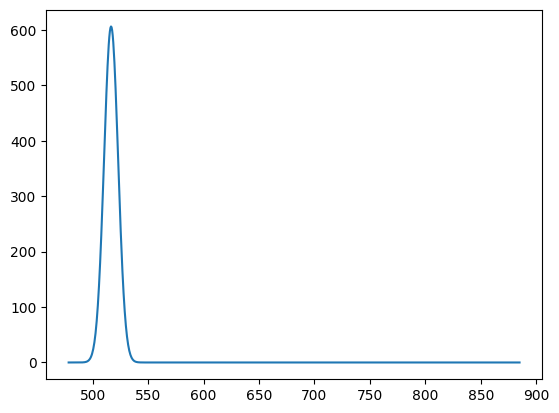

In [7]:
# Get baseline
bl_dirpath = '/home/hargy/Scientific/DataCold/Experimental-Data/Project-Phoenix/PHASE-I/Coll2/BL/'
x, _       = sg.read_spectrum(os.path.join(bl_dirpath, 'it_0.txt'))
it_mtx       = sg.gen_iteration_matrix(bl_dirpath)
combined_arr = sg.combine_iterations(it_mtx, method='mean-weighted')

bl = np.mean(combined_arr)

# Ramana Scratchpad
dirpath  = '/home/hargy/Scientific/DataCold/Experimental-Data/Project-Phoenix/PHASE-I/Coll2/H2O/'
x, _     = sg.read_spectrum(os.path.join(dirpath, 'it_0.txt'))

it_mtx       = sg.gen_iteration_matrix(dirpath)
combined_arr = sg.combine_iterations(it_mtx, method='mean-weighted')

# subtract baseline
combined_arr = sg.remove_baseline(combined_arr, bl)

factor       = 0.5*4*15.4
fin_arr      = sg.scale_array(combined_arr, factor)

popt = sg.get_raman_gaussian(x, fin_arr)

def gaussian(x, a, s, m):
    return a * np.exp(-((x-m)**2)/(2*(s**2)))

plt.plot(x, gaussian(x, *popt))

In [8]:
popt

array([606.00076945,   6.34197742, 516.60540373])

In [9]:
np.trapezoid(x, gaussian(x, *popt))

np.float64(-9633.5854822841)

In [15]:
dirs_in_path = collpath.split('/')
phase = dirs_in_path[-3]
coll  = dirs_in_path[-2]


In [17]:
phase

'PHASE-I'

In [20]:
st = '4x'
st[0]

'4'

In [24]:
y = np.array([
  [1,1,1,1],
  [5,5,5,5],
  [7,7,7,7]
 ])

np.diff(y, axis=0)

array([[4, 4, 4, 4],
       [2, 2, 2, 2]])

In [25]:
mydict = {
    'x' : 2,
    'y' : 3,
    'f' : 5
}

x, y, f = mydict

In [27]:
y

'y'

In [37]:
x_arr = [0,1,2,3,4]
y1    = [2,5,4,5,3]
y2    = [2,5,4,5,3]
y3    = [1,1,2,2,3]
y4    = [9,1,2,2,3]

idx_arrays = [[1,1,1,1,1],
              ['Wavelength', 'y1' 'y2', 'y3', 'y4']]

index = pd.MultiIndex.from_arrays(idx_arrays, names=('Collection', 'Type'))

df = pd.DataFrame({'Arrays': [11, 11, 11, 11, 11]},
                  index=index)

ValueError: all arrays must be same length

In [41]:
arrays = [['Falcon', 'Falcon', 'Parrot', 'Parrot'],
        ['Captive', 'Wild', 'Captive', 'Wild']]
index = pd.MultiIndex.from_arrays(arrays, names=('Animal', 'Type'))
df = pd.DataFrame({'Max Speed': [x_arr, y1, y2, y3]},
                  index=index)
df

Max Speed
Animal Type                    
Falcon Captive  [0, 1, 2, 3, 4]
       Wild     [2, 5, 4, 5, 3]
Parrot Captive  [2, 5, 4, 5, 3]
       Wild     [1, 1, 2, 2, 3]

In [44]:
import pandas as pd
import numpy as np

# Example wavelengths
wavelengths = np.arange(5)

# Expand arrays into columns
expanded = pd.DataFrame({
    ('Falcon', 'Captive'): x_arr,
    ('Falcon', 'Wild'):    y1,
    ('Parrot', 'Captive'): y2,
    ('Parrot', 'Wild'):    y3,
}, index=wavelengths)

expanded.index.name = 'Wavelength'
expanded.columns = pd.MultiIndex.from_tuples(expanded.columns, names=['Animal', 'Type'])
expanded


Animal      Falcon       Parrot     
Type       Captive Wild Captive Wild
Wavelength                          
0                0    2       2    1
1                1    5       5    1
2                2    4       4    2
3                3    5       5    2
4                4    3       3    3

In [ ]:
size = 25

samples = np.array(['S1','S1', 'S1', 'S2', 'S2', 'S2'])
colls   = np.array(['coll1', 'coll2', 'coll3', 'coll1', 'coll2', 'coll3'])
wls     = np.arange(0,size, 1)

data = {}

for sample in samples:
    for coll in colls:
        y = np.random.randint(0, 100, size=size)
        data[(sample, coll)]




index = pd.MultiIndex.from_arrays(colls, names = ['Collection'])

df = pd.DataFrame(data, index = index)
df

Falcon       Parrot     
           Captive Wild Captive Wild
Collection                          
coll1            1    2       3    4
coll1            1    2       3    4
coll1            1    2       3    4
coll1            1    2       3    4
coll2            1    2       3    4

In [87]:

size = 25

samples = np.array(['S1','S1', 'S1', 'S2', 'S2', 'S2'])
colls   = np.array(['coll1', 'coll2', 'coll3', 'coll1', 'coll2', 'coll3'])

wls = np.arange(size)

# MultiIndex columns: (Sample, Coll)
cols = pd.MultiIndex.from_arrays(
    [samples, colls],
    names=['Sample', 'Coll']
)

data = {}

# zip pairs so you only create one spectrum per (Sample, Coll)
for s, c in zip(samples, colls):
    data[(s, c)] = np.random.randint(0, 100, size=size)

df = pd.DataFrame(data, index=wls)
df.index.name = 'Wavelength'

df

S1                S2            
           coll1 coll2 coll3 coll1 coll2 coll3
Wavelength                                    
0             78    27    99    43    31    48
1             21    27    57    51    45    29
2             88    43    42    33    72    72
3             77    65    49    57    29    61
4             63    69    72    40    45     0
5             15    81     3    88    85    50
6             35    27     0    60    52    41
7             75    80    72    73    35    57
8             72    32    98    13    26    80
9             78    11    14    18    83    43
10            66    16    96    82    55     4
11            25     9    58    80    46    56
12            56    81    44    94    52    59
13            45    67    70    73    69    65
14            91     4    26    47    23     8
15            78    25    21    13    15    36
16            92    11    99    75    42    79
17            76    74    35    87    14    70
18            98    23    47     7    52    79
19             4    81    25    64    92     5
20            66     3    36    47    37    43
21            36    61    94    25    12    76
22            16    88     3    22    10     2
23            59    73    12    50     7    48
24            59    54    93    41    88    34

In [ ]:
import numpy as np
import pandas as pd

size = 25

samples = np.array(['S1','S1', 'S1', 'S2', 'S2', 'S2'])
colls   = np.array(['coll1', 'coll2', 'coll3', 'coll1', 'coll2', 'coll3'])
wls     = np.arange(0, size, 1)

# We'll build a list of index tuples and matching x,y values
index_tuples = []
y_vals = []

# One random spectrum for each (sample, coll) pair
for sample, coll in zip(samples, colls):
    y_spectrum = np.random.randint(0, 100, size=size)

    for wl_idx, wl_val in enumerate(wls):
        index_tuples.append((sample, coll, wl_val))  # row index: Sample, Collection, Wavelength                       # x = wavelength
        y_vals.append(y_spectrum[wl_idx])            # y = corresponding intensity

# Build MultiIndex
index = pd.MultiIndex.from_tuples(
    index_tuples,
    names=['Sample', 'Collection', 'Wavelength']
)

# Build DataFrame with x, y columns
df = pd.DataFrame({'y': y_vals}, index=index)

df.loc[('S1', 'coll1')]


,y
Wavelength,
0,43
1,48
2,48
3,44
4,55
5,21
6,69
7,95
8,55


In [74]:
#!/usr/bin/env python3
import pandas as pd

def build_multiindex_df():
    # Define the levels of the MultiIndex (row index)
    animals = ['Falcon', 'Falcon', 'Parrot', 'Parrot']
    types   = ['Captive', 'Wild',  'Captive', 'Wild']

    index = pd.MultiIndex.from_arrays(
        [animals, types],
        names=['Animal', 'Type']
    )

    # Some example data for each (Animal, Type)
    data = {
        "Max Speed": [380, 390, 24, 26],     # km/h, totally made up
        "Avg Speed": [160, 170, 15, 16],
        "Weight":    [1.2, 1.0, 0.3, 0.32],  # kg, also made up
    }

    df = pd.DataFrame(data, index=index)
    return df

if __name__ == "__main__":
    df = build_multiindex_df()

    print("\nFull DataFrame:\n")
    print(df)

    # A few example lookups so you see how it behaves:
    print("\nAll rows for Falcon:\n")
    print(df.loc['Falcon'])

    print("\nFalcon, Captive row:\n")
    print(df.loc[('Falcon', 'Captive')])

    print("\nMax Speed for Parrot, Wild:\n")
    print(df.loc[('Parrot', 'Wild'), 'Max Speed'])



Full DataFrame:

                Max Speed  Avg Speed  Weight
Animal Type                                 
Falcon Captive        380        160    1.20
       Wild           390        170    1.00
Parrot Captive         24         15    0.30
       Wild            26         16    0.32

All rows for Falcon:

         Max Speed  Avg Speed  Weight
Type                                 
Captive        380        160     1.2
Wild           390        170     1.0

Falcon, Captive row:

Max Speed    380.0
Avg Speed    160.0
Weight         1.2
Name: (Falcon, Captive), dtype: float64

Max Speed for Parrot, Wild:

26


In [78]:
df.columns

Index(['Max Speed', 'Avg Speed', 'Weight'], dtype='object')

In [ ]:
from pathlib import Path
phasepath = Path('/home/hargy/Scientific/DataCold/Experimental-Data/Project-Phoenix/PHASE-I/')

colls = []
for collpath in sorted(phasepath.glob('Coll*')):
    coll = str(collpath).split('/')[-1]
    colls.append(coll)

samples = []
for samplepath in sorted(collpath.iterdir()):
    sample = str(samplepath).split('/')[-1]
    samples.append(sample)

toignore = ['power.txt', 'SP_B2_35']
for ig in toignore:
    samples.remove(ig)

# -- cycle through exposures --

data = {}

coll_indexes = []
sample_indexes = []

for sample in samples:
    for coll in colls:
        dirpath =  phasepath / coll / sample
        for itpath in sorted(dirpath.iterdir(), key=lambda p: int(p.stem.split('_')[1])):
            x, y = sg.read_spectrum(itpath)

In [176]:
import numpy as np
import pandas as pd
from pathlib import Path

phasepath = Path('/home/hargy/Scientific/DataCold/Experimental-Data/Project-Phoenix/PHASE-I/')

colls = []
for collpath in sorted(phasepath.glob('Coll*')):
    coll = str(collpath).split('/')[-1]
    colls.append(coll)

samples = []
for samplepath in sorted(collpath.iterdir()):
    sample = str(samplepath).split('/')[-1]
    samples.append(sample)

toignore = ['power.txt', 'SP_B2_35']
for ig in toignore:
    samples.remove(ig)

index_tuples  = []
y_vals = []

index_tuples_meta = []
t_exp_vals = []
gain_vals = []
temp_vals = []
date_vals = []
spec_wl_vals = []
slit_vals = []
pow_vals = []


for sample in samples:
    for coll in colls:
        dirpath =  phasepath / coll / sample


        power_path = phasepath / coll / 'power.txt'
        with open(power_path) as f:
            lines = f.readlines()
            power = float(lines[1].split(',')[1].strip())

        for it, itpath in enumerate(sorted(dirpath.iterdir(), key=lambda p: int(p.stem.split('_')[1]))):
            wls, y_spectrum = sg.read_spectrum(itpath)

            for wl_idx, wl_val in enumerate(wls):
                index_tuples.append((sample, coll, it, wl_val))
                y_vals.append(y_spectrum[wl_idx])

            index_tuples_meta.append((sample, coll, it))
            acq_data = sg.read_acquisition_data(itpath)
            t_exp_vals.append(acq_data['Exposure Time (secs)'])
            gain_vals.append(acq_data['Pre-Amplifier Gain'])
            try:
                temp_vals.append(acq_data['Temperature (C)'])
            except:
                temp_vals.append(acq_data['Unstabilized Temperature (C)'])
            date_vals.append(acq_data['Date and Time'])
            spec_wl_vals.append(acq_data['Wavelength (nm)'])
            slit_vals.append(acq_data['Input Side Slit Width (um)'])
            pow_vals.append(power)


# Build MultiIndex
index = pd.MultiIndex.from_tuples(
    index_tuples,
    names=['Sample', 'Collection', 'Iteration', 'Wavelength']
)

index_meta = pd.MultiIndex.from_tuples(
    index_tuples_meta,
    names=['Sample', 'Collection', 'Iteration']
)

# Build DataFrame with x, y columns
df = pd.DataFrame({'Spectrum': y_vals}, index=index)

# Build meta DataFrame
df_meta = pd.DataFrame({'T_exp'        : t_exp_vals,
                       'Gain'          : gain_vals,
                       'Temperature'   : temp_vals,
                       'Date and Time' : date_vals,
                       'Spectro Wavelength' : spec_wl_vals,
                       'Slit Width'    : slit_vals,
                       'Power'         : power},
                       index=index_meta)


raw = df.reset_index()
raw.to_csv('/home/hargy/Downloads/raw.csv', index=False)

meta = df_meta.reset_index()
meta.to_csv('/home/hargy/Downloads/meta.csv', index=False) 

In [ ]:
read_df = pd.read_csv('/home/hargy/Downloads/raw.csv')
df = read_df.set_index(['Sample', 'Collection', 'Iteration', 'Wavelength'])
wls = df.index.get_level_values('Wavelength').unique().to_numpy()
wls

array([478.32681, 478.84332, 479.35983, 479.87631, 480.39282, 480.9093 ,
       481.42575, 481.94223, 482.45868, 482.97513, 483.49158, 484.00803,
       484.52444, 485.04086, 485.55728, 486.07367, 486.59006, 487.10645,
       487.62283, 488.13919, 488.65555, 489.17191, 489.68826, 490.20459,
       490.72092, 491.23724, 491.75354, 492.26984, 492.78613, 493.30243,
       493.8187 , 494.33496, 494.85123, 495.36746, 495.8837 , 496.39993,
       496.91617, 497.43237, 497.94858, 498.46478, 498.98096, 499.49713,
       500.01331, 500.52945, 501.04562, 501.56174, 502.07788, 502.59399,
       503.11011, 503.62622, 504.1423 , 504.65839, 505.17447, 505.69052,
       506.20657, 506.72263, 507.23865, 507.75467, 508.27069, 508.78668,
       509.30267, 509.81866, 510.33463, 510.85059, 511.36655, 511.88248,
       512.39844, 512.91437, 513.43024, 513.94617, 514.46204, 514.97791,
       515.49377, 516.00964, 516.52551, 517.04132, 517.55719, 518.073  ,
       518.58881, 519.10461, 519.62036, 520.13617, 

In [182]:
read_meta = pd.read_csv('/home/hargy/Downloads/meta.csv')
meta      = read_df.set_index(['Sample', 'Collection', 'Iteration'])

idx = ('LiF10_107', 'Coll2', 10)

df.loc[idx]['Temperature']

np.float64(-90.0)

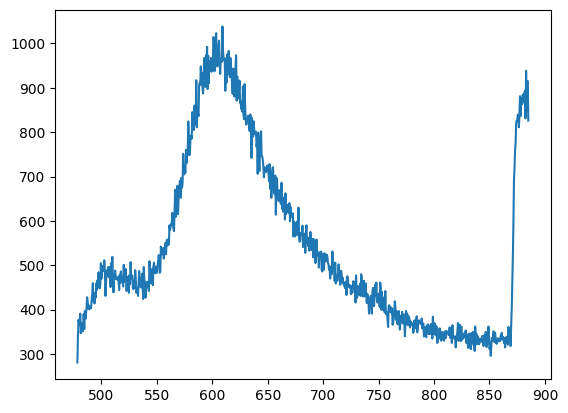

In [165]:
idx = ('LiF10_107', 'Coll1', 3)
y = df.loc[idx]['Spectrum'].to_numpy()
wls = df.index.get_level_values('Wavelength').unique().to_numpy()
plt.plot(wls, y);

In [149]:
spectra = df.reset_index()
# columns: Sample, Collection, Iteration, Wavelength, Spectrum


In [150]:
spectra

,Sample,Collection,Iteration,Wavelength,Spectrum
0,AM,Coll1,0,478.32681,262.0
1,AM,Coll1,0,478.84332,306.0
2,AM,Coll1,0,479.35983,350.0
3,AM,Coll1,0,479.87631,332.0
4,AM,Coll1,0,480.39282,319.0
...,...,...,...,...,...
230395,LiF10_108,Coll4,11,883.03680,940.0
230396,LiF10_108,Coll4,11,883.53394,894.0
230397,LiF10_108,Coll4,11,884.03107,926.0
230398,LiF10_108,Coll4,11,884.52808,910.0


In [2]:
phasepath = Path('/home/hargy/Scientific/DataCold/Experimental-Data/Project-Phoenix/PHASE-I/')
savedir = '/home/hargy/Downloads/testdata/'

In [3]:
meta_df = sg.gen_df_meta(phasepath)
raw_df  = sg.gen_df_raw(phasepath)
comb_df = sg.gen_df_comb(phasepath)

wls = raw_df.index.get_level_values('Wavelength').unique().to_numpy()

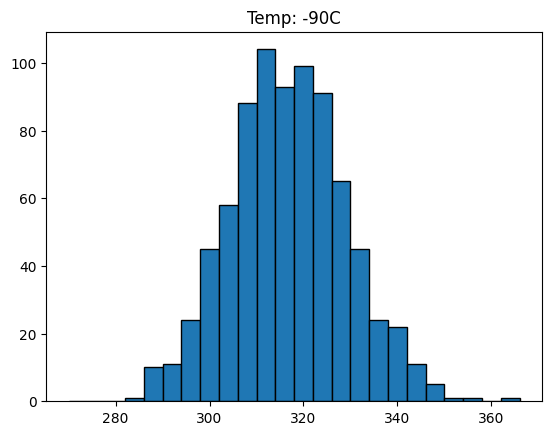

In [10]:
idx = ('BL', 'Coll1', 2)
y   = raw_df.loc[idx]['Spectrum'].to_numpy()
wls = raw_df.index.get_level_values('Wavelength').unique().to_numpy()

temp = meta_df.loc[idx]['Temperature']
bins = np.arange(270,370, 4)
plt.hist(y, bins = bins, edgecolor = 'black')
plt.title('Temp: '+temp+'C');

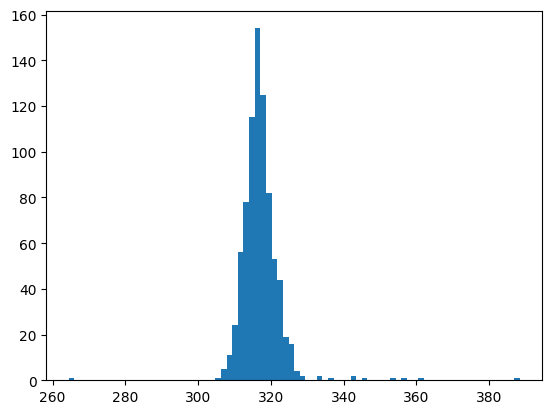

In [23]:
plt.hist(y, bins = 80);

In [4]:
meta_df.loc[('H2O', 'Coll1')]

,DateTime,SoftwareVersion,Temperature,Model,DataType,AcquisitionMode,TriggerMode,Exposure_s,ReadoutMode,HorizontalBinning,...,PixelReadoutRate_MHz,BaselineClamp,ClockAmplitude,OutputAmplifier,CameraSerialNumber,PreAmpGain,SpuriousNoiseFilterMode,PhotonCounted,DataAveragingFilterMode,Power_mW
Iteration,,,,,,,,,,,,,,,,,,,,,
0,Fri Oct 17 06:47:02.066 2025,4.30.30000.0,-90,DU971P_UVB,Counts,Single Scan,Internal,0.5,Full Vertical Binning,2,...,3,ON,Normal,Conventional,SR-2646,4,No Filter,false,No Filter,15.4
1,Fri Oct 17 06:47:13.774 2025,4.30.30000.0,-90,DU971P_UVB,Counts,Single Scan,Internal,0.5,Full Vertical Binning,2,...,3,ON,Normal,Conventional,SR-2646,4,No Filter,false,No Filter,15.4
2,Fri Oct 17 06:47:24.986 2025,4.30.30000.0,-90,DU971P_UVB,Counts,Single Scan,Internal,0.5,Full Vertical Binning,2,...,3,ON,Normal,Conventional,SR-2646,4,No Filter,false,No Filter,15.4
3,Fri Oct 17 06:47:36.242 2025,4.30.30000.0,-90,DU971P_UVB,Counts,Single Scan,Internal,0.5,Full Vertical Binning,2,...,3,ON,Normal,Conventional,SR-2646,4,No Filter,false,No Filter,15.4
4,Fri Oct 17 06:47:47.503 2025,4.30.30000.0,-90,DU971P_UVB,Counts,Single Scan,Internal,0.5,Full Vertical Binning,2,...,3,ON,Normal,Conventional,SR-2646,4,No Filter,false,No Filter,15.4
5,Fri Oct 17 06:47:58.794 2025,4.30.30000.0,-90,DU971P_UVB,Counts,Single Scan,Internal,0.5,Full Vertical Binning,2,...,3,ON,Normal,Conventional,SR-2646,4,No Filter,false,No Filter,15.4
6,Fri Oct 17 06:48:10.017 2025,4.30.30000.0,-90,DU971P_UVB,Counts,Single Scan,Internal,0.5,Full Vertical Binning,2,...,3,ON,Normal,Conventional,SR-2646,4,No Filter,false,No Filter,15.4
7,Fri Oct 17 06:48:21.251 2025,4.30.30000.0,-90,DU971P_UVB,Counts,Single Scan,Internal,0.5,Full Vertical Binning,2,...,3,ON,Normal,Conventional,SR-2646,4,No Filter,false,No Filter,15.4
8,Fri Oct 17 06:48:32.524 2025,4.30.30000.0,-90,DU971P_UVB,Counts,Single Scan,Internal,0.5,Full Vertical Binning,2,...,3,ON,Normal,Conventional,SR-2646,4,No Filter,false,No Filter,15.4


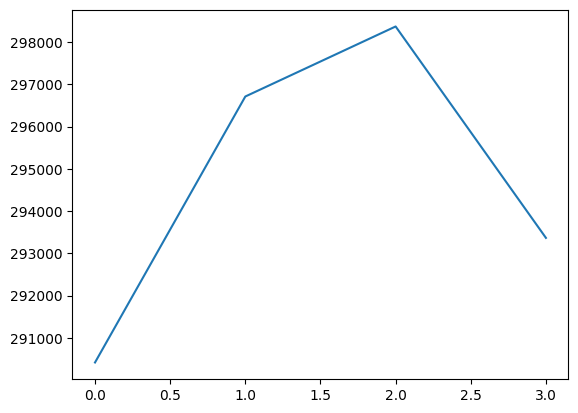

In [19]:
raman_df = sg.proc_raman_df(comb_df)
factor   = sg.get_norm_factor(meta_df, ('H2O','Coll1', 0))
signals  = raman_df['signal'].to_numpy()# / factor
popt = raman_df.loc['Coll1']['popt'].to_numpy()[0]



plt.plot(signals)

In [21]:
298000 / (15.4*0.5*4)

9675.324675324675

In [22]:
raman_df

,signal,popt
Collection,,
Coll1,290416.288102,"[18241.617536005386, 6.351374049620826, 516.57..."
Coll2,296714.427185,"[18664.826177736766, 6.341978708075985, 516.60..."
Coll3,298372.664757,"[18768.55718005323, 6.342174848378655, 516.677..."
Coll4,293366.645410,"[18430.95034224899, 6.349990442183774, 516.616..."


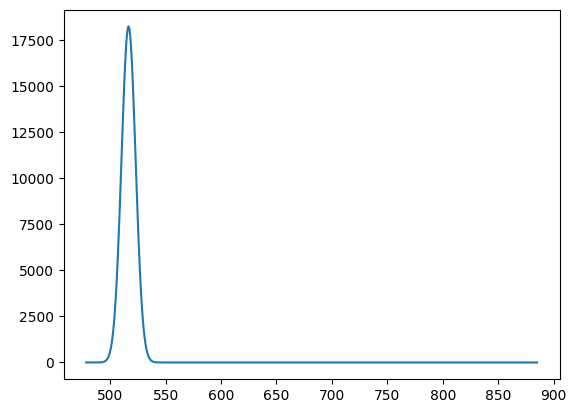

In [13]:
plt.plot(wls, sg.gaussian(wls, *popt))

In [25]:
popt[0]

array([1.82416175e+04, 6.35137405e+00, 5.16571285e+02])

In [11]:
np.trapezoid([1, 2, 3], x=[1, 20, 30])

np.float64(53.5)

In [ ]:
comb_matrix = []

for sample in df.index.get_level_values('Sample').unique():
    for coll in df.index.get_level_values('Collection').unique():
        

arr = comb_df.loc['LiF10_108']['Spectrum'].to_numpy()